<a href="https://colab.research.google.com/github/Ritwiks97/My-projects/blob/main/Virat_The_Chase_Master_!!_(by_Ritwik_Saha).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
odi_df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Virat_Kohli.csv")

In [ ]:
odi_df.head()

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,22,1,0,54.54,2.0,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,67,6,0,55.22,2.0,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,38,4,0,65.78,1.0,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,66,7,0,81.81,1.0,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,46,3,1,67.39,1.0,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [ ]:
odi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        132 non-null    int64  
 1   BF          132 non-null    int64  
 2   4s          132 non-null    int64  
 3   6s          132 non-null    int64  
 4   SR          132 non-null    float64
 5   Pos         132 non-null    float64
 6   Dismissal   132 non-null    object 
 7   Inns        132 non-null    int64  
 8   Opposition  132 non-null    object 
 9   Ground      132 non-null    object 
 10  Start Date  132 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 11.5+ KB


In [ ]:
# Total Runs Between 18-Aug-08 - 22-Jan-17
odi_df["Runs"].sum()

6184

In [ ]:
# Average Runs Between 18-Aug-08 - 22-Jan-17
odi_df["Runs"].mean()

46.84848484848485

In [ ]:
matches = odi_df.index
figure = px.line(odi_df, x=matches, y="Runs",
                 title='Runs Scored by Virat Kohli Between 18-Aug-08 - 22-Jan-17')
figure.show()

In [ ]:
# Batting Positions
odi_df["Pos"] = odi_df["Pos"].map({3.0: "Batting At 3", 4.0: "Batting At 4", 2.0: "Batting At 2",
                               1.0: "Batting At 1", 7.0:"Batting At 7", 5.0:"Batting At 5",
                               6.0: "batting At 6"})

Pos = odi_df["Pos"].value_counts()
label = Pos.index
counts = Pos.values
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Number of Matches At Different Batting Positions')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [ ]:
#Total runs by batting position
pd.pivot_table(odi_df, index= "Pos", values='Runs', aggfunc='sum')

,Runs
Pos,
Batting At 1,110
Batting At 2,51
Batting At 3,4477
Batting At 4,1370
Batting At 5,123
Batting At 7,30
batting At 6,23


In [ ]:
label = odi_df["Pos"]
counts = odi_df["Runs"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Runs By Virat Kohli At Different Batting Positions')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [ ]:
centuries = odi_df.query("Runs >= 100")
figure = px.bar(centuries, x=centuries["Inns"], y = centuries["Runs"],
                color = centuries["Runs"],
                title="Centuries By Virat Kohli in First Innings Vs. Second Innings")
figure.show()

In [ ]:
# Dismissals of Virat Kohli
dismissal = odi_df["Dismissal"].value_counts()
label = dismissal.index
counts = dismissal.values
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Dismissals of Virat Kohli')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [ ]:
#Most Runs Against Teams
pd.pivot_table(odi_df, index= "Opposition", values=['Runs','4s','6s'], aggfunc='sum',)

,4s,6s,Runs
Opposition,,,
v Australia,95,13,999
v Bangladesh,51,5,544
v England,81,11,830
v Ireland,3,0,34
v Netherlands,2,0,12
v New Zealand,79,13,877
v Pakistan,2,0,22
v South Africa,36,10,558
v Sri Lanka,108,9,1084


In [ ]:
figure = px.bar(odi_df, x=odi_df["Opposition"], y = odi_df["Runs"], color = odi_df["Runs"],
            title="Most Runs Against Teams")
figure.show()

In [ ]:
#Most Centuries Against Teams
figure = px.bar(centuries, x=centuries["Opposition"], y = centuries["Runs"],
                color = centuries["Runs"],
                title="Most Centuries Against Teams")
figure.show()

In [ ]:
#Virat Kohli's High Strike Rates

strike_rate = odi_df.query("SR >= 120")
print(strike_rate)

     Runs  BF  4s  6s      SR           Pos Dismissal  Inns     Opposition  \
8      27  19   4   0  142.10  Batting At 7    bowled     1    v Sri Lanka   
32    100  83   8   2  120.48  Batting At 4   not out     1   v Bangladesh   
56     23  11   3   0  209.09  batting At 6   not out     1  v West Indies   
76     43  34   4   1  126.47  Batting At 3    caught     1      v England   
78    102  83  13   2  122.89  Batting At 3    caught     1  v West Indies   
83    100  52   8   7  192.30  Batting At 3   not out     2    v Australia   
85    115  66  18   1  174.24  Batting At 3   not out     2    v Australia   
93     78  65   7   2  120.00  Batting At 3    caught     2  v New Zealand   
130     8   5   2   0  160.00  Batting At 3    caught     1      v England   

            Ground Start Date  
8           Rajkot  15-Dec-09  
32           Dhaka  19-Feb-11  
56          Indore   8-Dec-11  
76      Birmingham  23-Jun-13  
78   Port of Spain   5-Jul-13  
83          Jaipur  16-Oct-

In [ ]:
#Virat Kohli's High Strike Rates in First Innings Vs. Second Innings
figure = px.bar(strike_rate, x = strike_rate["Inns"],
                y = strike_rate["SR"],
                color = strike_rate["SR"],
            title="Virat Kohli's High Strike Rates in First Innings Vs. Second Innings")
figure.show()

In [ ]:
figure = px.scatter(data_frame = odi_df, x="Runs",
                    y="4s", size="SR", trendline="ols",
                    title="Relationship Between Runs Scored and Fours")
figure.show()

In [ ]:
figure = px.scatter(data_frame = odi_df, x="Runs",
                    y="6s", size="SR", trendline="ols",
                    title= "Relationship Between Runs Scored and Sixes")
figure.show()

In [ ]:
#innings wise runs scored by Kohli against different teams
pd.pivot_table(odi_df, index= "Opposition", columns='Inns', values= "Runs",aggfunc='sum')

Inns,1,2
Opposition,,
v Australia,344.0,655.0
v Bangladesh,214.0,330.0
v England,248.0,582.0
v Ireland,NaN,34.0
v Netherlands,NaN,12.0
v New Zealand,172.0,705.0
v Pakistan,16.0,6.0
v South Africa,204.0,354.0
v Sri Lanka,430.0,654.0


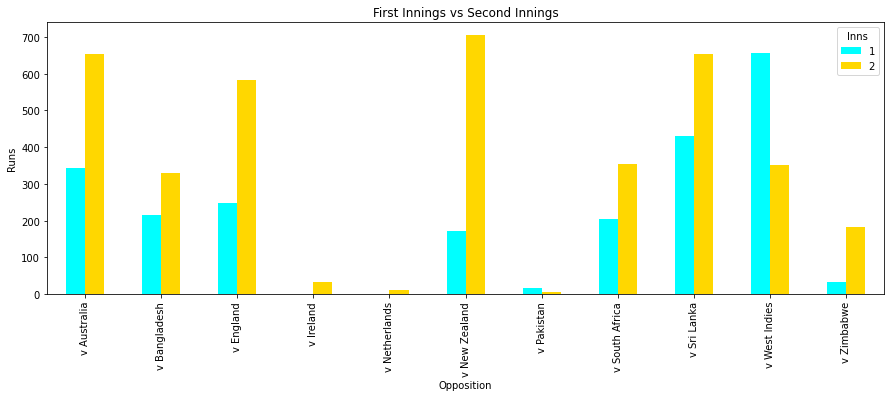

In [ ]:
#innings wise runs scored by Kohli against different teams_(Graphical Representation)
pd.pivot_table(odi_df, index= "Opposition", columns='Inns', values= "Runs",aggfunc='sum').plot(
    kind= 'bar',
    figsize=(15,5),
    color=['cyan','gold'],
    title="First Innings vs Second Innings",
    xlabel='Opposition',ylabel='Runs')

In [ ]:
#Innings-wise totals runs scored by Kohli
pd.pivot_table(odi_df, index= "Inns", values= "Runs", aggfunc='sum')

,Runs
Inns,
1,2317
2,3867


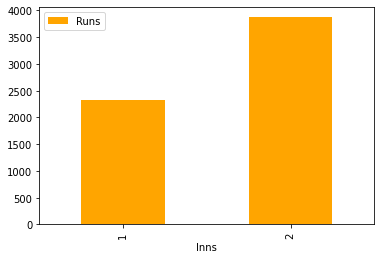

In [ ]:
#Innings-wise totals runs scored by Kohli (Graphical Representation)
pd.pivot_table(odi_df, index= "Inns", values= "Runs", aggfunc='sum').plot(kind='bar',color='orange')

In [ ]:
#Thank You!